<a href="https://colab.research.google.com/github/AaronWenbu/Captone6/blob/main/Overall_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [ ]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the cleaned data
#data=pd.read_csv('/content/Cleaned_Data (2).csv')
data=pd.read_csv('/content/drive/Shareddrives/Capstone-B6/Dataset/Cleaned_Data.csv')

In [ ]:
# a quick look at the data
data.sample(3)

,Unnamed: 0,DFCIMRN,PatientBirthDTS,GenderDSC,InterpreterRequiredFLG,PrimaryLanguageNM,RaceDSC,EthnicityNM,MyChartStatusDSC,MilesFromLongwoodRange
641421,641421,0xB0A4038A600875BFC885B91ABB07889B63D9B92C00B7...,2004,Male,N,English,Unknown,Unknown,Unknown,60+ mi
485408,485408,0xFD58F359FE7CBE47C449A4223A5FAD0441C339068FBF...,1941,Female,N,English,White or Caucasian,American,Activated,31-35 mi
32851,32851,0x4D374207863EC25143DC0F472F807FB73A6136040CF7...,1955,Female,N,English,White or Caucasian,Unavailable,Activated,11-15 mi


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699432 entries, 0 to 699431
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              699432 non-null  int64 
 1   DFCIMRN                 699432 non-null  object
 2   PatientBirthDTS         699432 non-null  int64 
 3   GenderDSC               699432 non-null  object
 4   InterpreterRequiredFLG  699432 non-null  object
 5   PrimaryLanguageNM       699432 non-null  object
 6   RaceDSC                 699432 non-null  object
 7   EthnicityNM             699432 non-null  object
 8   MyChartStatusDSC        699432 non-null  object
 9   MilesFromLongwoodRange  699432 non-null  object
dtypes: int64(2), object(8)
memory usage: 53.4+ MB


# **Overall EDA**

**MyCartStatusDSC**

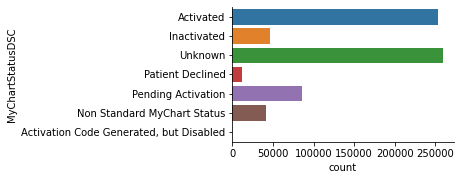

In [ ]:
ax = sns.catplot(y="MyChartStatusDSC", kind="count", data=data, height=2.6, aspect=2.5)

In [ ]:
data_mychart=data['MyChartStatusDSC'].value_counts()[:5].sort_values(ascending=False)

In [ ]:
data_mychart=pd.DataFrame(data_mychart)
data_mychart.columns=['count']
data_mychart

,count
Unknown,259759
Activated,253965
Pending Activation,85781
Inactivated,46142
Non Standard MyChart Status,41865


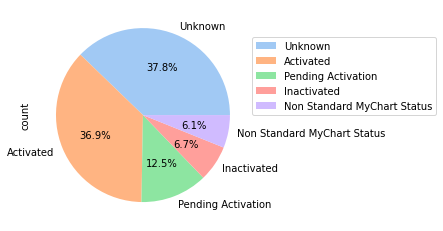

In [ ]:
labels = data_mychart.index
colors = sns.color_palette('pastel')[0:5]
data_mychart.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
plt.legend(loc=(1.0,0.5))

**Gender**

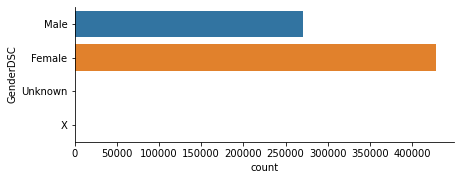

In [ ]:
ax = sns.catplot(y="GenderDSC", kind="count", data=data, height=2.6, aspect=2.5)

**Birthyear**

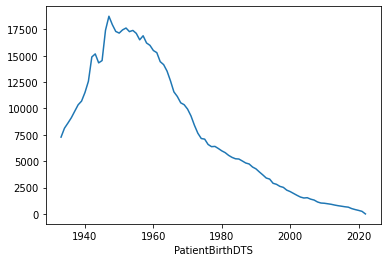

In [ ]:
# look at the number of customers
data_birthyear=data.groupby('PatientBirthDTS').size()
sns.lineplot(data=data_birthyear)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


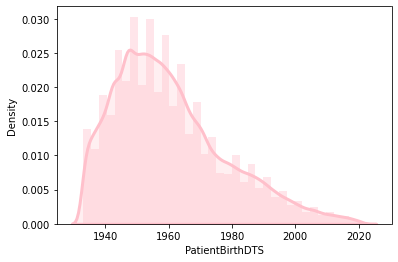

In [ ]:
#density plot
sns.distplot(data['PatientBirthDTS'], hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             kde_kws = {'shade': True, 'linewidth': 3})

**Age**

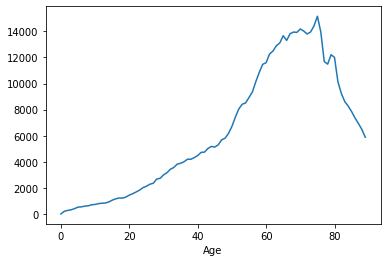

In [ ]:
data['Age'] = 2022 - data['PatientBirthDTS']
data_age=data.groupby('Age').size()
sns.lineplot(data=data_age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


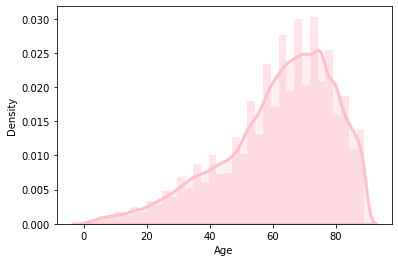

In [ ]:
sns.distplot(data['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             kde_kws = {'shade': True, 'linewidth': 3})

**Primary Language**

In [ ]:
# delete the nulls
data["PrimaryLanguageNM"].replace({"Unavailable": "Unknown"}, inplace=True)
data_lan1=data['PrimaryLanguageNM'].value_counts()[:10].sort_values(ascending=False)
data_lan1=pd.DataFrame(data_lan1)
data_lan1.columns=['count']

# a quick look at the summary
data_lan1


,count
English,470665
Unknown,57893
Spanish,16523
Arabic,3942
Portuguese,1431
Russian,1415
Chinese-Mandarin,1142
creole-haitian,1017
DNUPortuguese,949
Vietnamese,921


(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 <a list of 6 Text major ticklabel objects>)

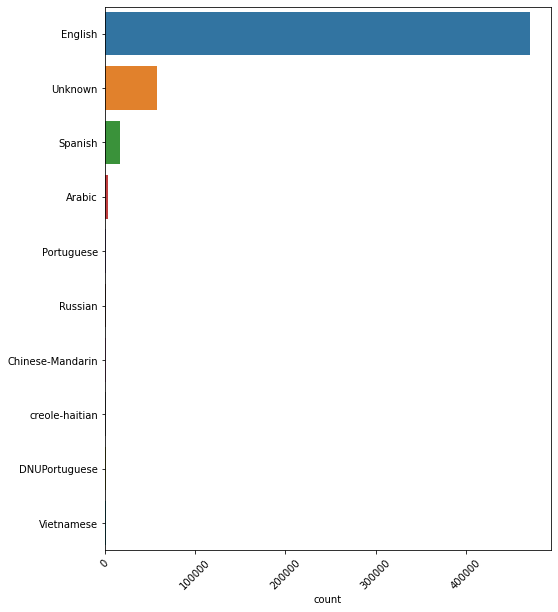

In [ ]:
# create the plot
plt.figure(figsize=(8,10))
sns.barplot(x='count',y=data_lan1.index,data=data_lan1)
plt.xticks(rotation=45)

Let's remove English, Unavailable and Spanish.

In [ ]:
data_lan1.drop(index=['English','Unknown','Spanish'],inplace=True)
# a quick look
data_lan1

,count
Arabic,3942
Portuguese,1431
Russian,1415
Chinese-Mandarin,1142
creole-haitian,1017
DNUPortuguese,949
Vietnamese,921


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

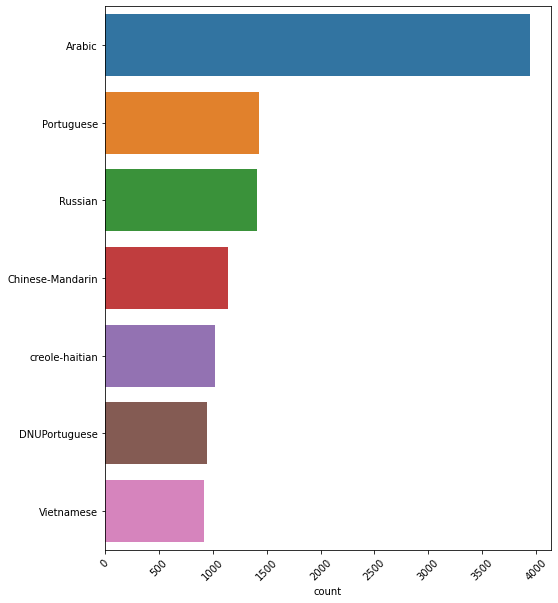

In [ ]:
# create the plot
plt.figure(figsize=(8,10))
sns.barplot(x='count',y=data_lan1.index,data=data_lan1)
plt.xticks(rotation=45)

**Race**

In [ ]:
# delete the nulls
data_race=data.dropna(axis=0,subset=['RaceDSC'],inplace=False)

In [ ]:
# create the top five dataframe
data["RaceDSC"].replace({"White": "White or Caucasian"}, inplace=True)
data_race1=data['RaceDSC'].value_counts()[:5].sort_values(ascending=False)
data_race1=pd.DataFrame(data_race1)
data_race1.columns=['count']

In [ ]:
# a quick look
data_race1

,count
White or Caucasian,410151
Unavailable,60622
Black or African American,30680
Other,22576
Asian,16011


Let's delete unavailable ones.

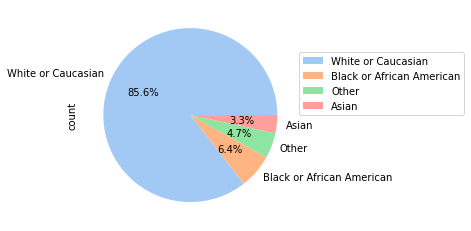

In [ ]:
data_race1.drop(index='Unavailable',inplace=True)
# create the plot
labels = data_race1.index
colors = sns.color_palette('pastel')[0:5]
data_race1.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
plt.legend(loc=(1.0,0.5))

**Ethnicity**

In [ ]:
#delete the null first
data["EthnicityNM"].replace({"Unavailable": "Unknown"}, inplace=True)
data_eth=data.dropna(axis=0,subset=['EthnicityNM'],inplace=False)
data_eth1=data_eth['EthnicityNM'].value_counts()[:5].sort_values(ascending=False)
data_eth1=pd.DataFrame(data_eth1)
data_eth1.columns=['count']

In [ ]:
# a quick look
data_eth1

,count
Unknown,214525
American,203937
Declined,33999
European,14405
African American,10839


(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text major ticklabel objects>)

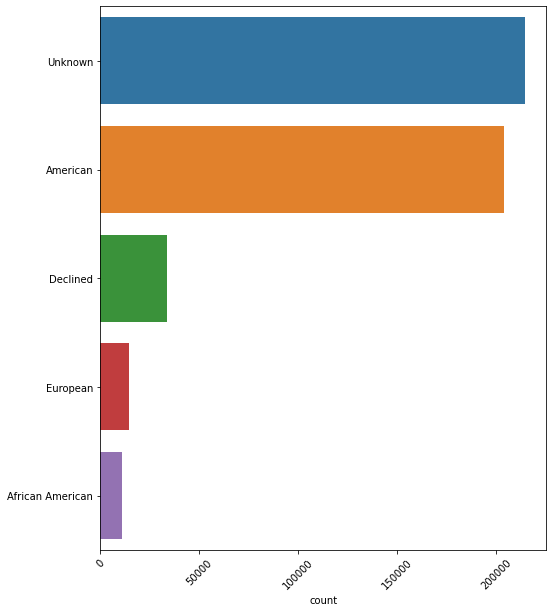

In [ ]:
# create the plot
plt.figure(figsize=(8,10))
sns.barplot(x='count',y=data_eth1.index,data=data_eth1)
plt.xticks(rotation=45)

Peole are not that willing to release the relevant information and the data is less informative in this case.

**MilesFromLongwoodRange**

In [ ]:
#delete the null first
data_mil=data.dropna(axis=0,subset=['MilesFromLongwoodRange'],inplace=False)
data_mil1=data_mil['MilesFromLongwoodRange'].value_counts()[:5].sort_values(ascending=False)
data_mil1=pd.DataFrame(data_mil1)
data_mil1.columns=['count']

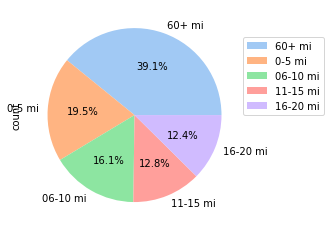

In [ ]:
# create the plot
labels = data_mil1.index
colors = sns.color_palette('pastel')[0:5]
data_mil1.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
plt.legend(loc=(1.0,0.5))

# **Demographic Exploration: Q1**

We want to look into the mychartstatus:

**Activated**

In [ ]:
uniqueValues = data['MyChartStatusDSC'].unique()
uniqueValues

array(['Activated', 'Inactivated', 'Unknown', 'Patient Declined',
       'Pending Activation', 'Non Standard MyChart Status',
       'Activation Code Generated, but Disabled'], dtype=object)

In [ ]:
#List of the different statuses
status=['Activated', 'Inactivated', 'Unknown', 'Patient Declined',
       'Pending Activation', 'Non Standard MyChart Status',
       'Activation Code Generated, but Disabled']

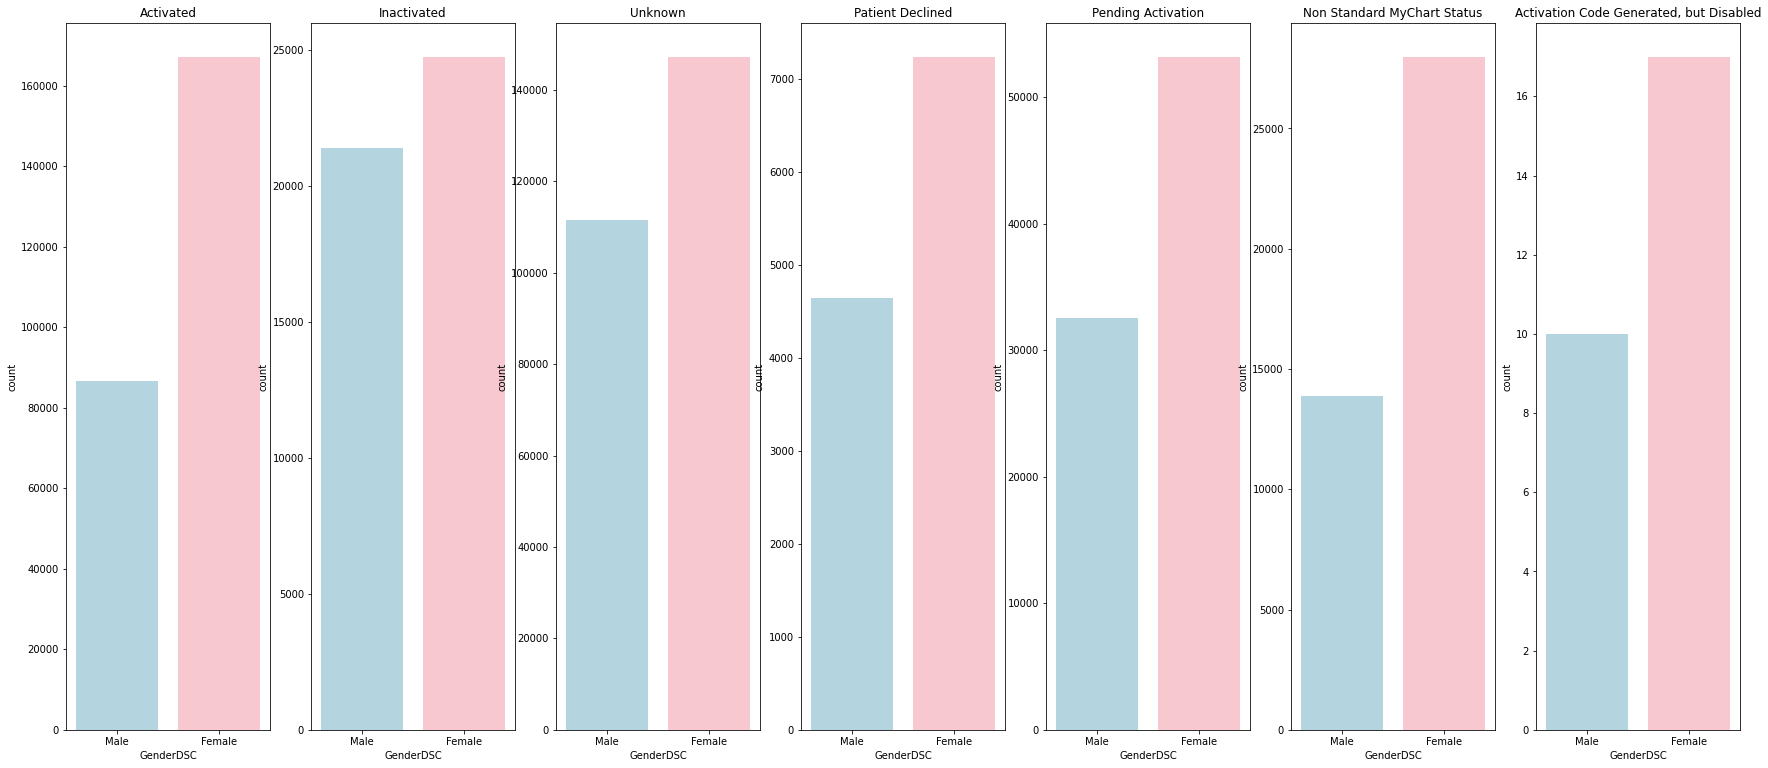

In [ ]:
#gender distribution
fig = plt.figure(figsize=(30,13))
for i, s in enumerate(status):
  status_1=data[data['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)
  palette = {'Male': "lightblue", 'Female': "pink",'Unknown':"green"  ,'X':"black"}
  sns.countplot(data=status_1,x="GenderDSC",palette=palette,order=['Male','Female'])
  
  

In [ ]:
#Converting Birth year to Age
data['Age']=2022-data['PatientBirthDTS']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

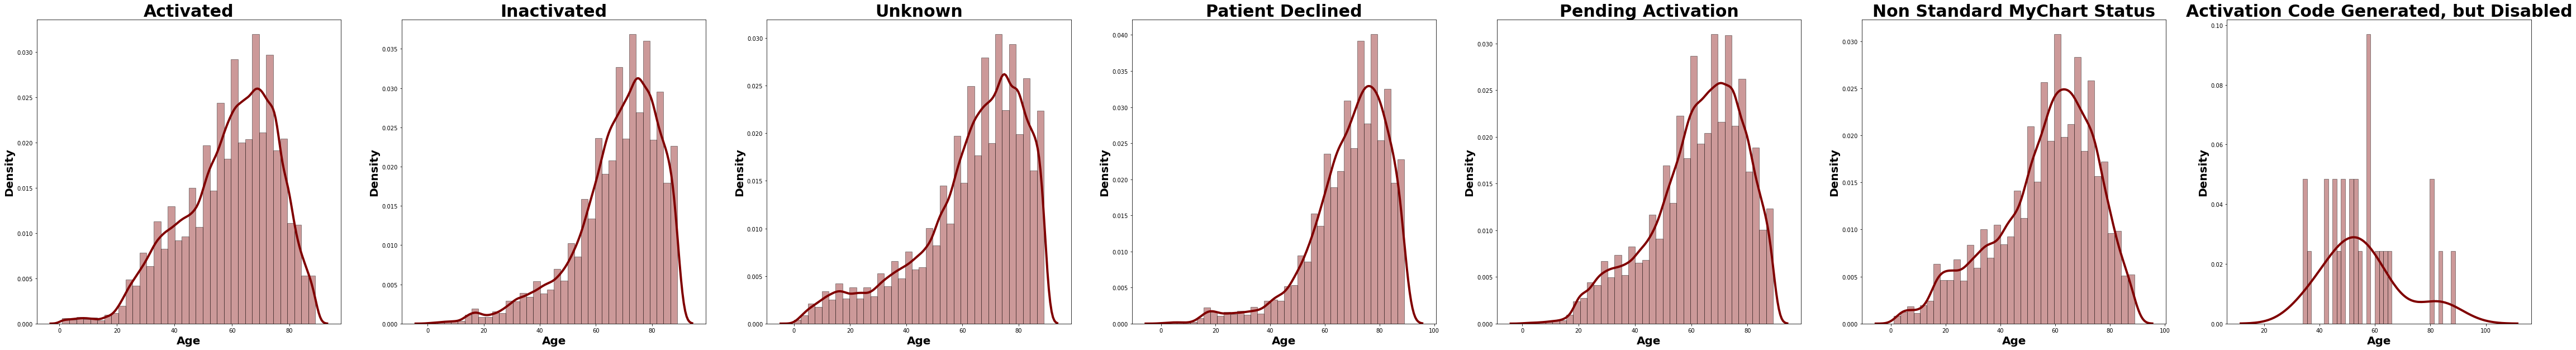

In [ ]:
#Age distribution
fig = plt.figure(figsize=(80,10))
for i, s in enumerate(status):
  status_1=data[data['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s,fontweight="bold",fontsize=30)
  plt.xlabel("Age",fontweight="bold",fontsize=20)
  plt.ylabel("Density",fontweight="bold",fontsize=20)  
  sns.distplot(status_1['Age'], hist=True,color='maroon', kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
#Subsetting age
data_subset_age=data[data['Age']<=20]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

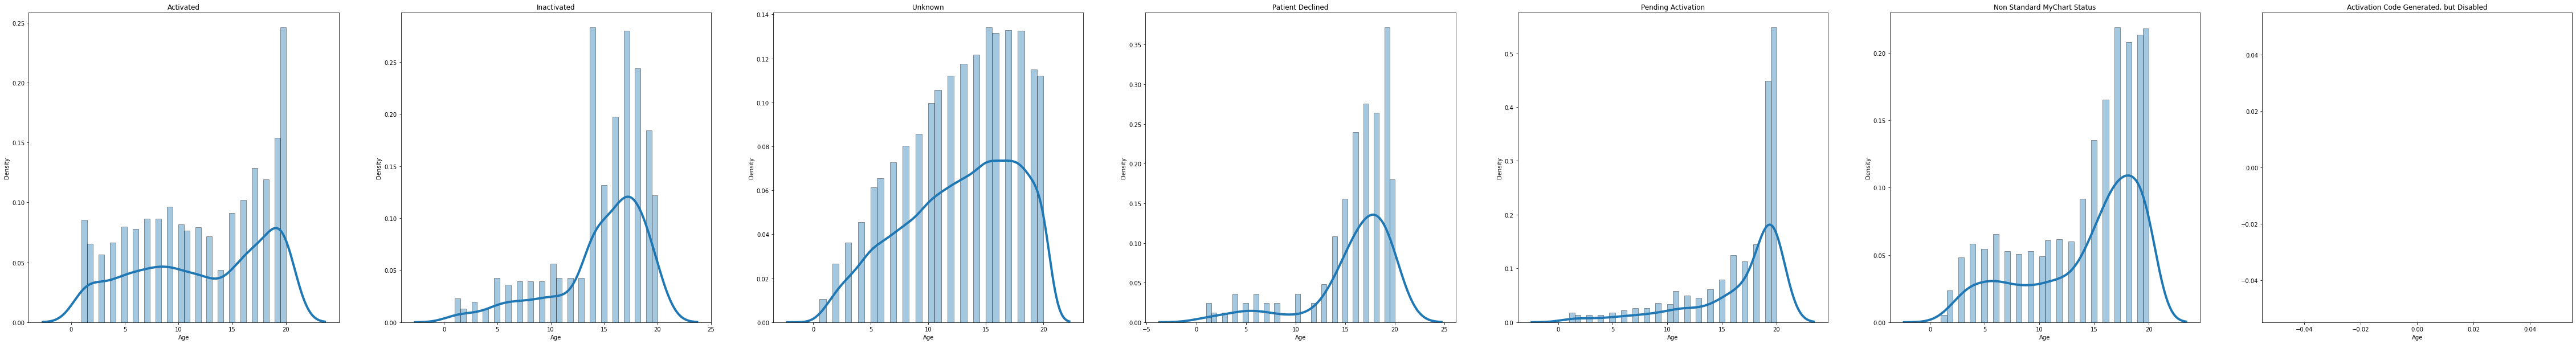

In [ ]:
fig = plt.figure(figsize=(80,10))
for i, s in enumerate(status):
  status_1=data_subset_age[data_subset_age['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)
  sns.distplot(status_1['Age'], hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
#Subsetting age
data_subset_age2=data[data['Age']>=65]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

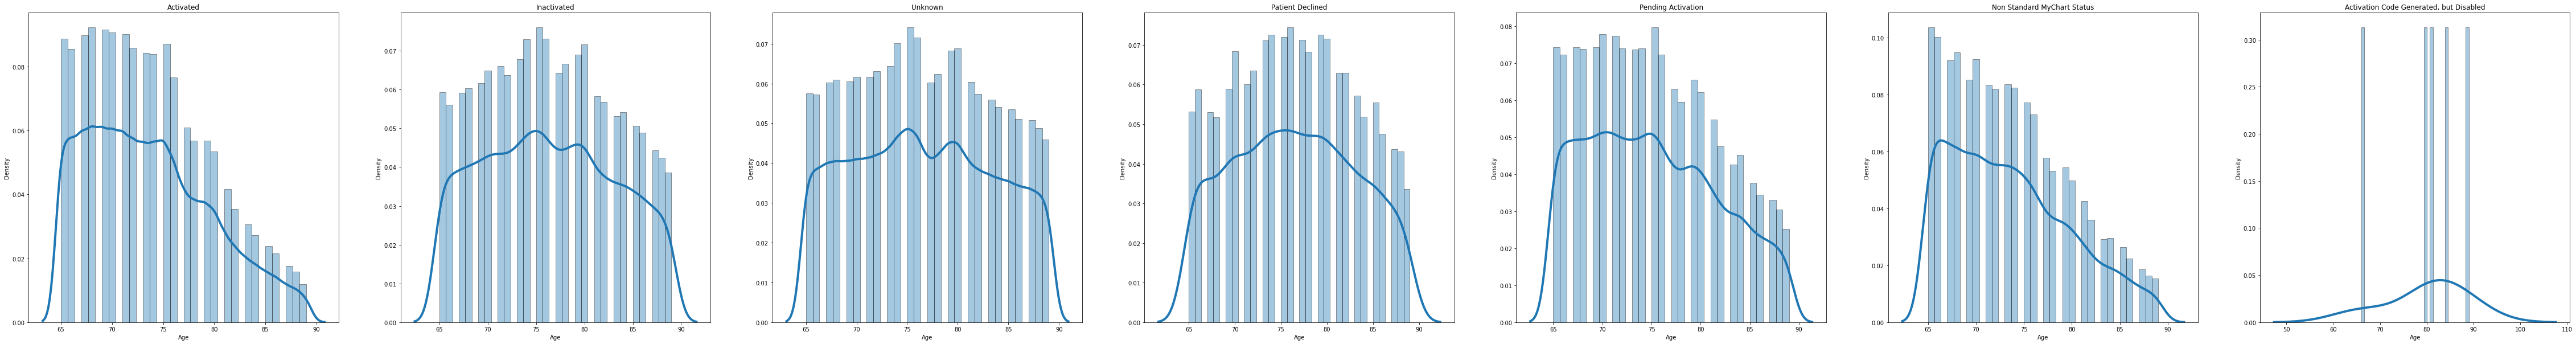

In [ ]:
fig = plt.figure(figsize=(80,10))
for i, s in enumerate(status):
  status_1=data_subset_age2[data_subset_age2['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)
  sns.distplot(status_1['Age'], hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

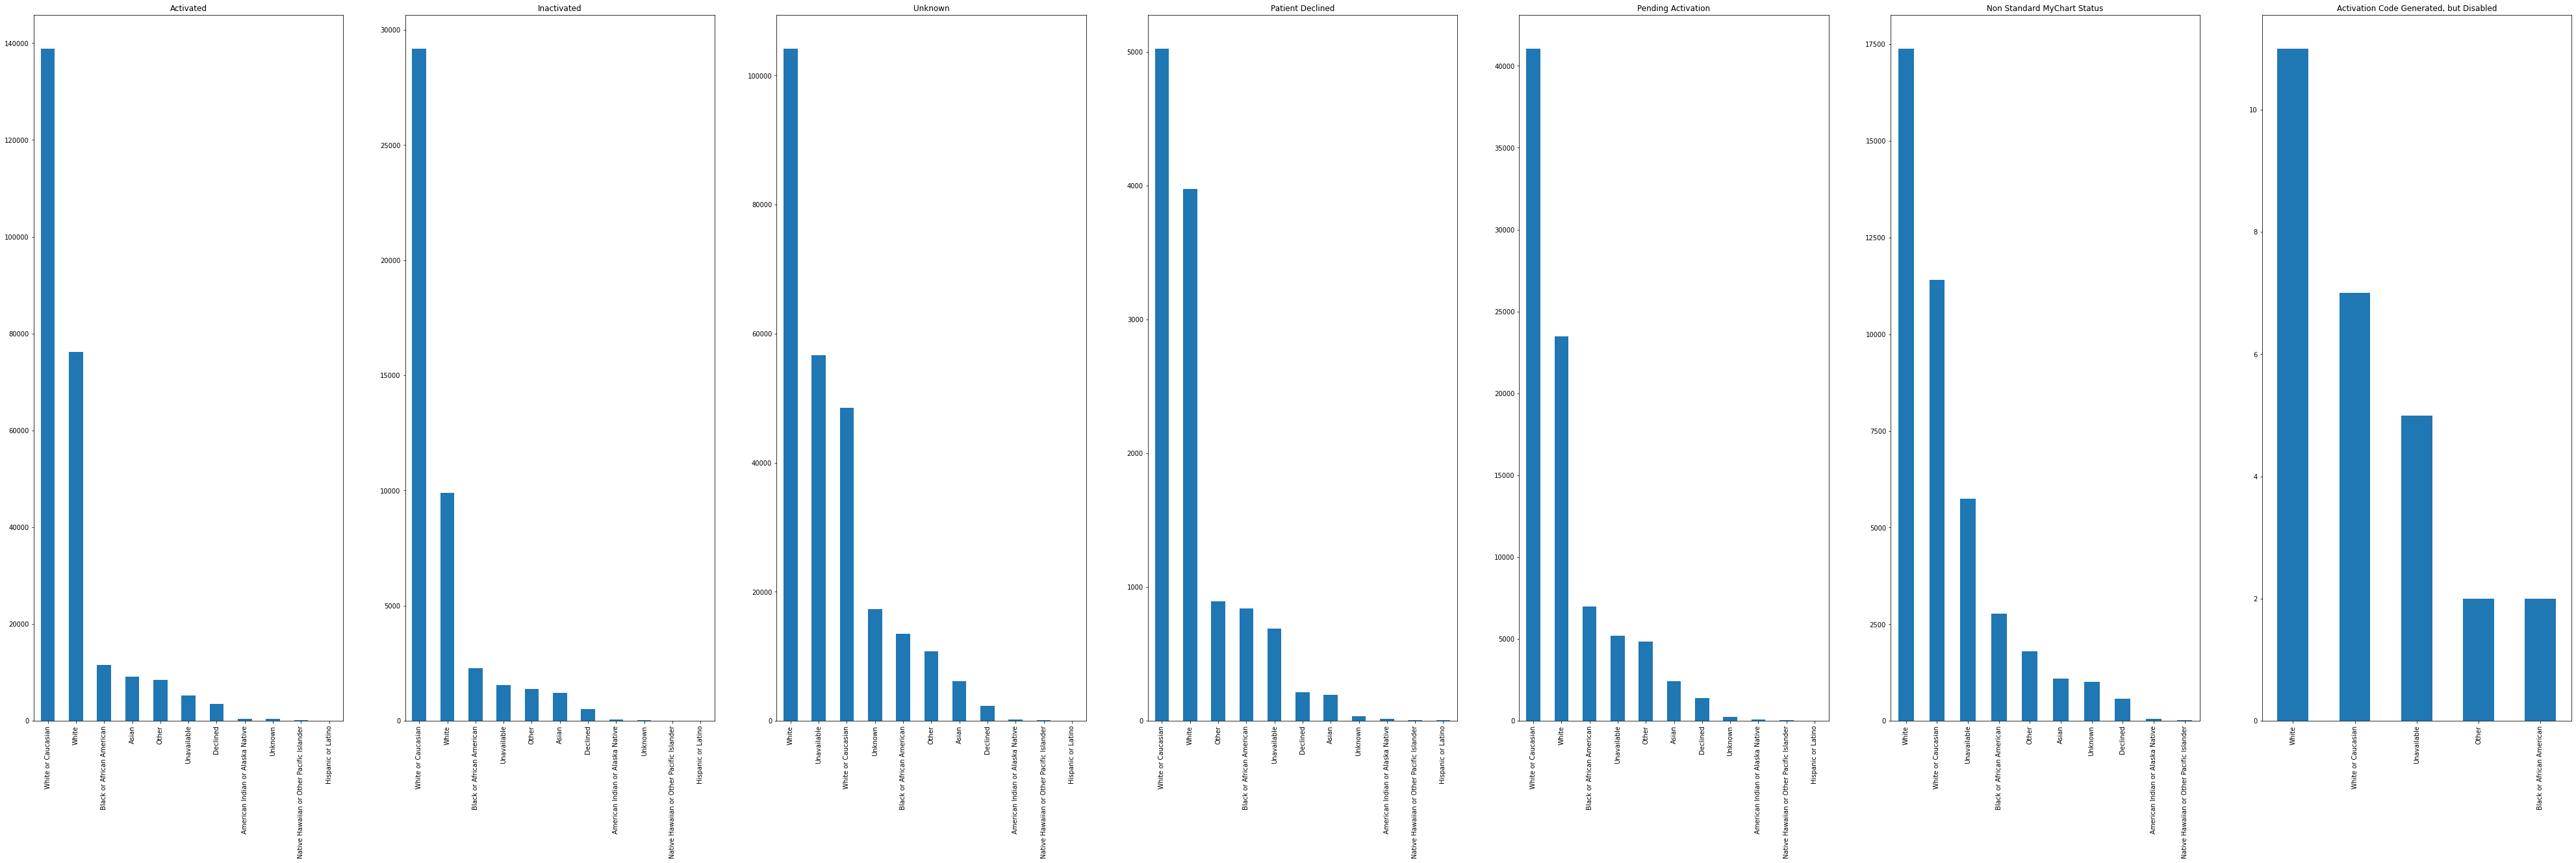

In [ ]:
#Race distribution
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status):
  status_1=data[data['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)
  status_1['RaceDSC'].value_counts().plot(kind="bar")

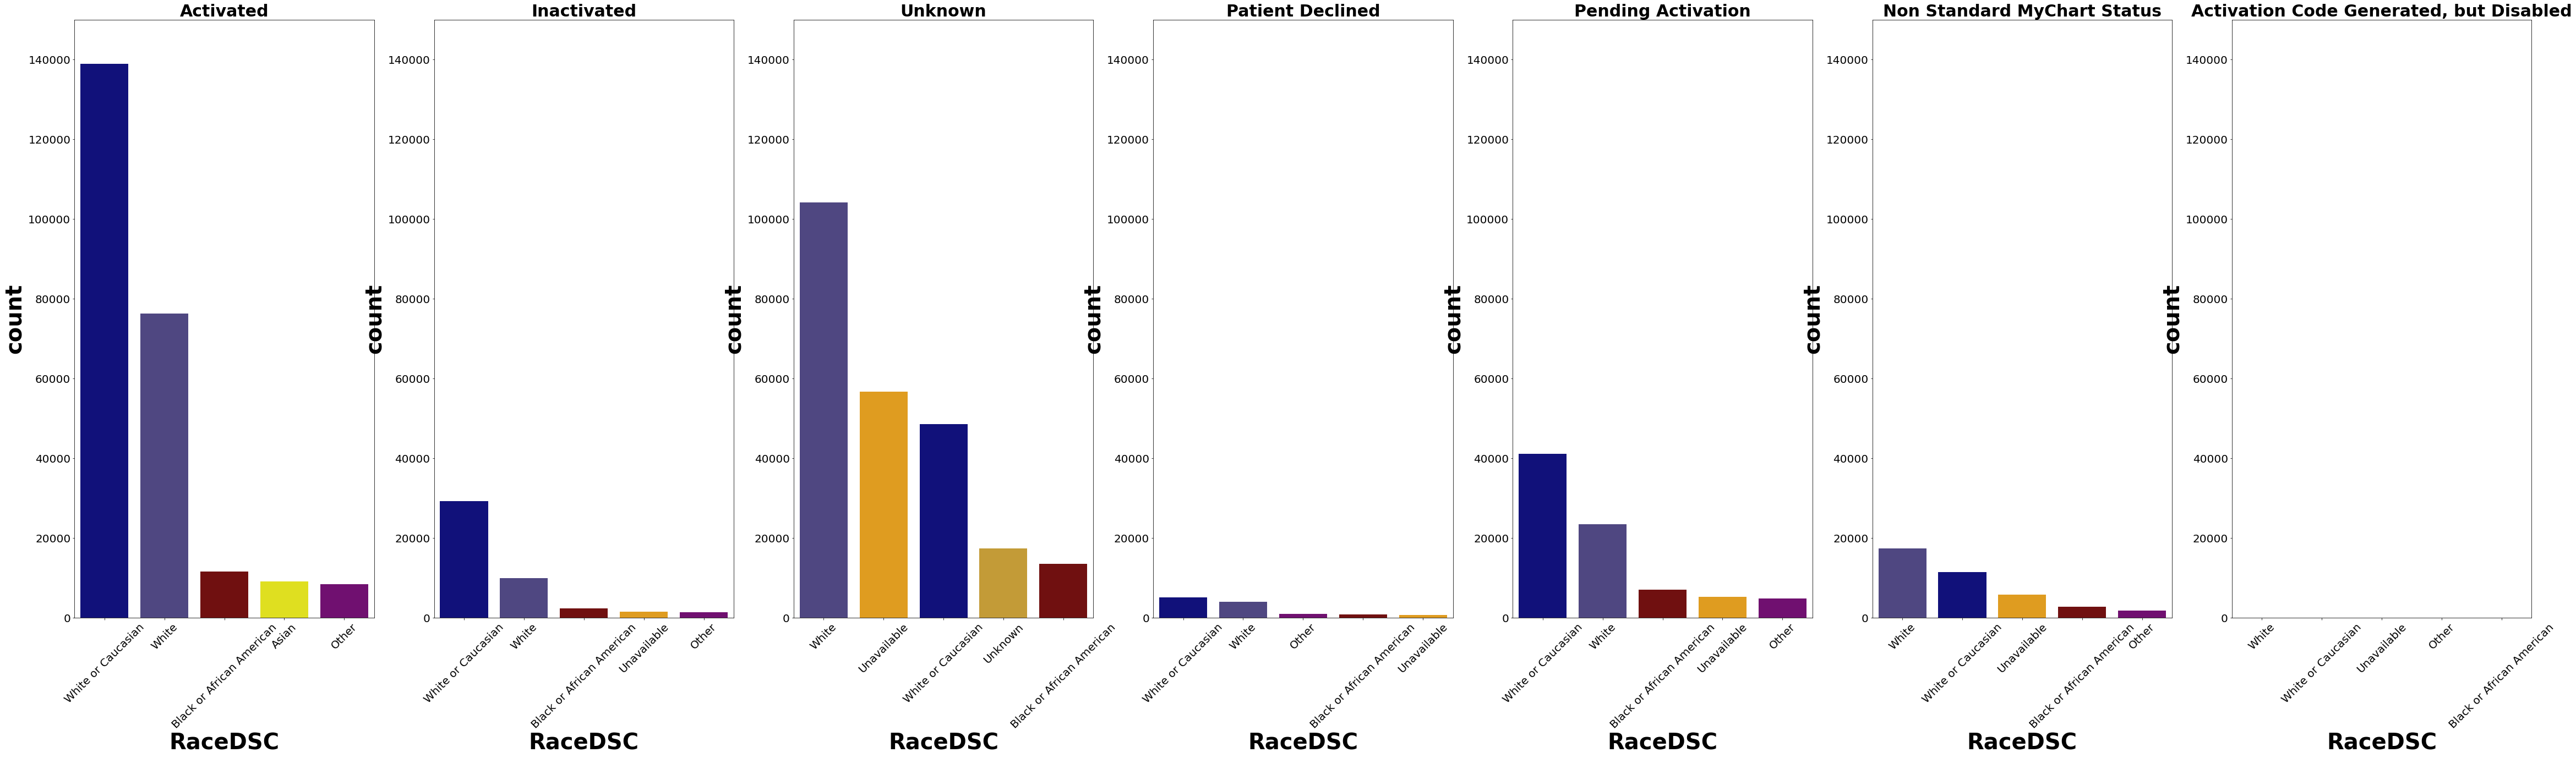

In [ ]:
#Simplified version of the race distribution for the presentation
fig = plt.figure(figsize=(80,20))
for i, s in enumerate(status):
  status_1=data[data['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)
  plt.title(s,fontweight="bold",fontsize=30)
  plt.xlabel("Race",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)
  plt.ylim(0, 150000)
  plt.xticks(fontsize=20,rotation=45)
  plt.yticks(fontsize=20)
  palette = {'White or Caucasian': "darkblue", 'White': "darkslateblue",'Black or African American':"maroon"  ,'Asian':"yellow",'Other':"purple",'Unavailable':"orange",'Unknown':"goldenrod"}
  sns.countplot(data=status_1,x='RaceDSC',order=pd.value_counts(status_1['RaceDSC']).iloc[:5].index,palette=palette)
  

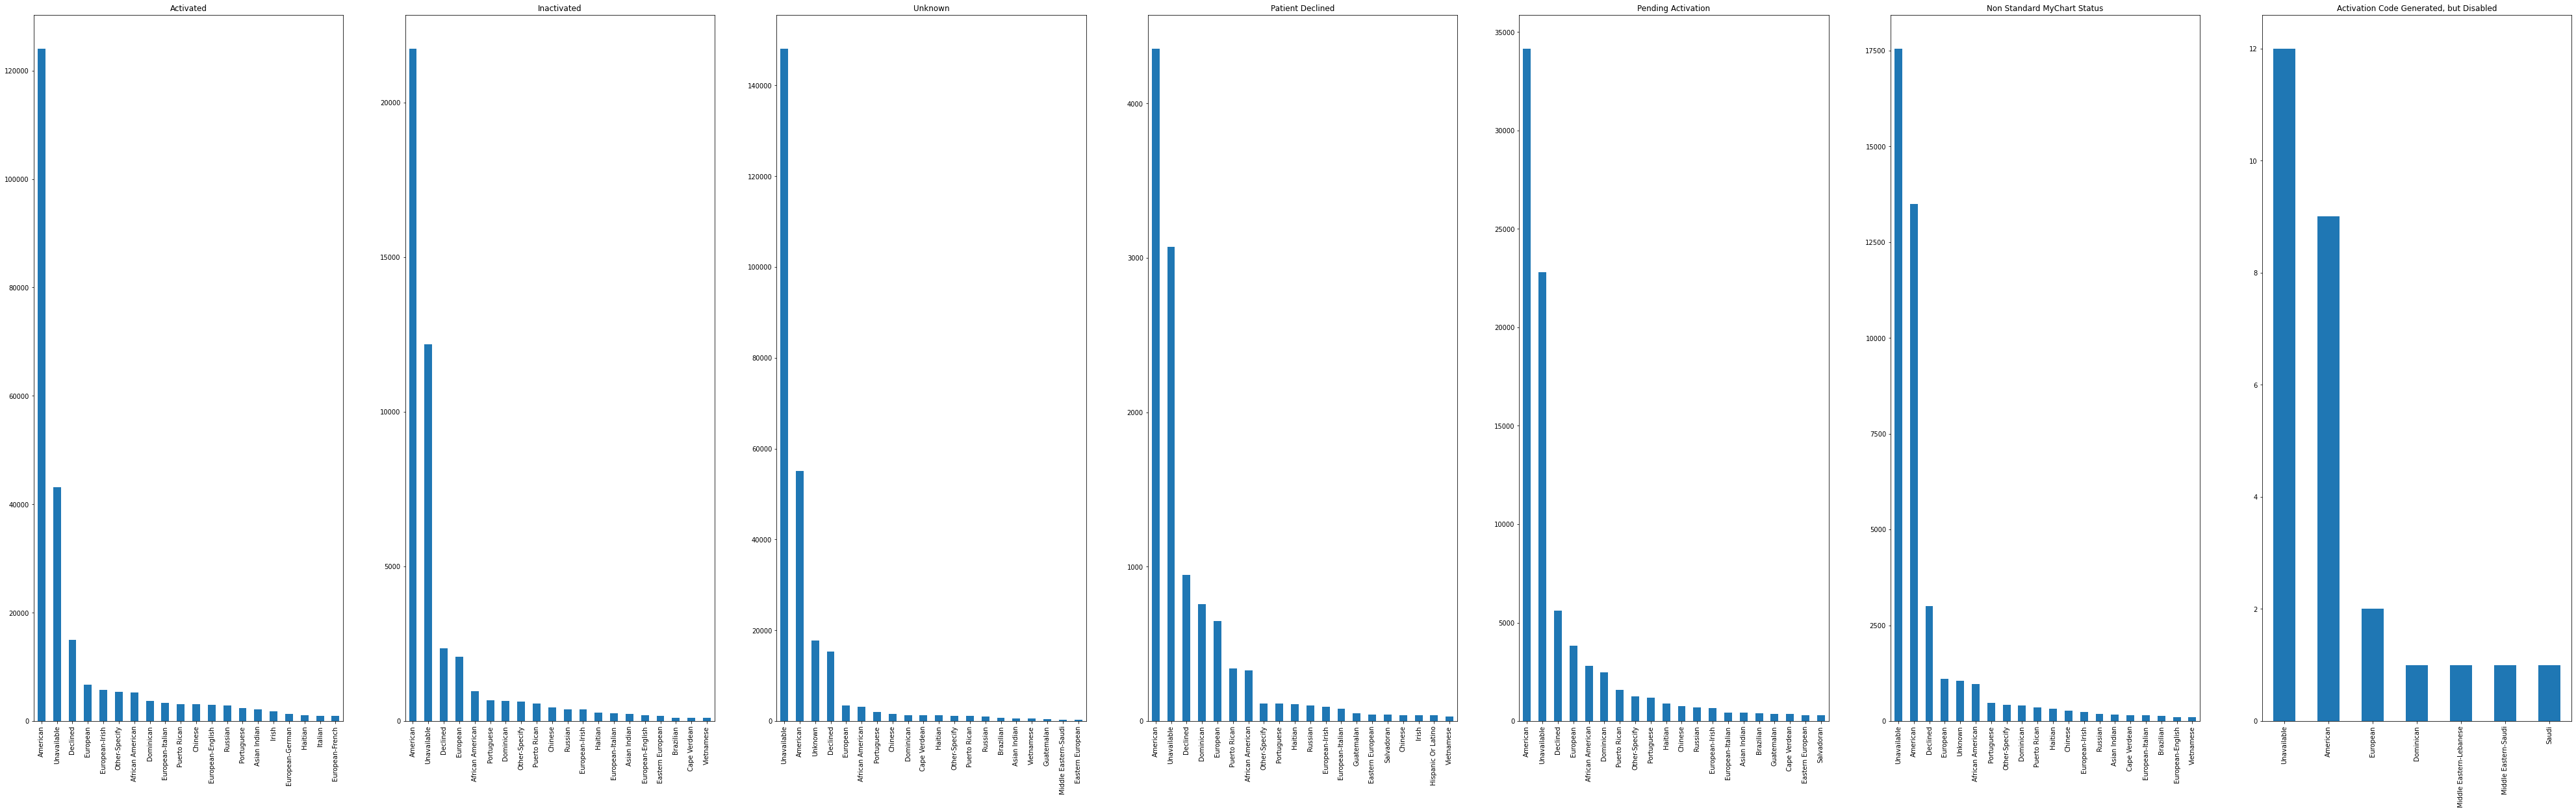

In [ ]:
#Top 20 ethnicities
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status):
  status_1=data[data['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)

  status_1['EthnicityNM'].value_counts()[:20].plot(kind='bar')

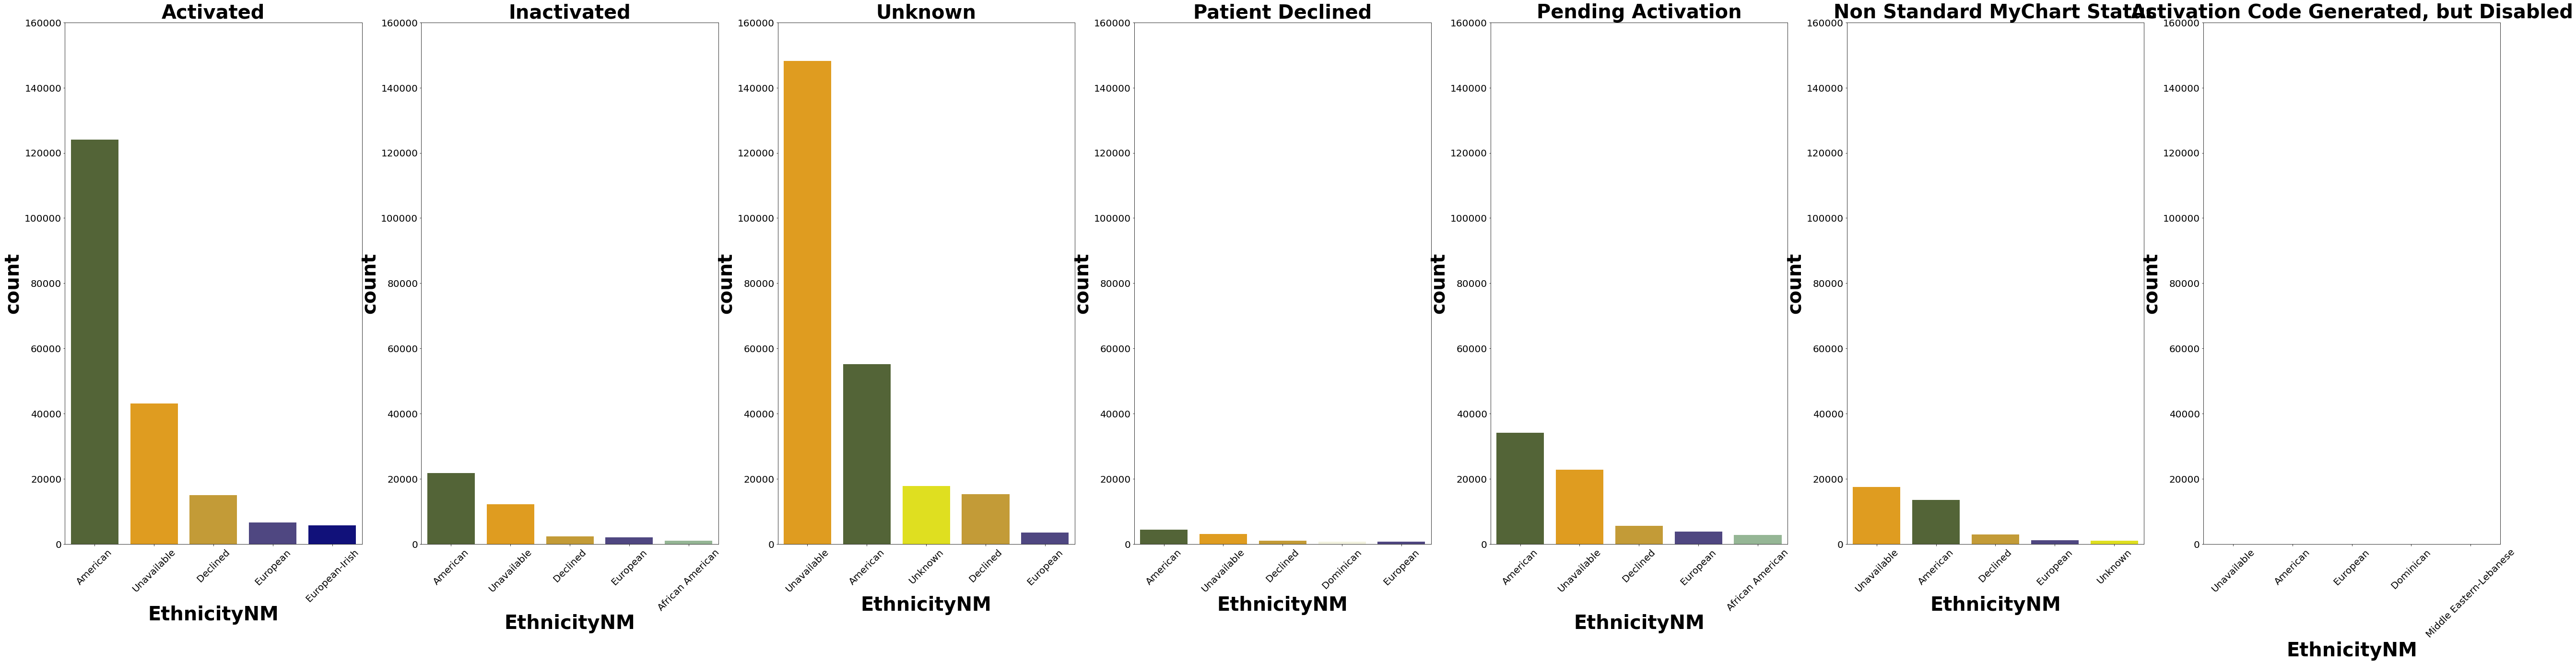

In [ ]:
fig = plt.figure(figsize=(91,20))
for i, s in enumerate(status):
  status_1=data[data['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)
  plt.ylim(0, 160000)
  plt.title(s,fontweight="bold",fontsize=40)
  plt.xlabel("Ethnicity",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)
  plt.xticks(fontsize=20,rotation=45)
  plt.yticks(fontsize=20)
  palette = {'African American': "darkseagreen",'Dominican': "beige",'American': "darkolivegreen",'European-Irish': "darkblue", 'European': "darkslateblue",'Middle Eastern-Lebanese':"maroon"  ,'Unknown':"yellow",'Other':"purple",'Unavailable':"orange",'Declined':"goldenrod"}
  sns.countplot(data=status_1,x='EthnicityNM',order=pd.value_counts(status_1['EthnicityNM']).iloc[:5].index,palette=palette)

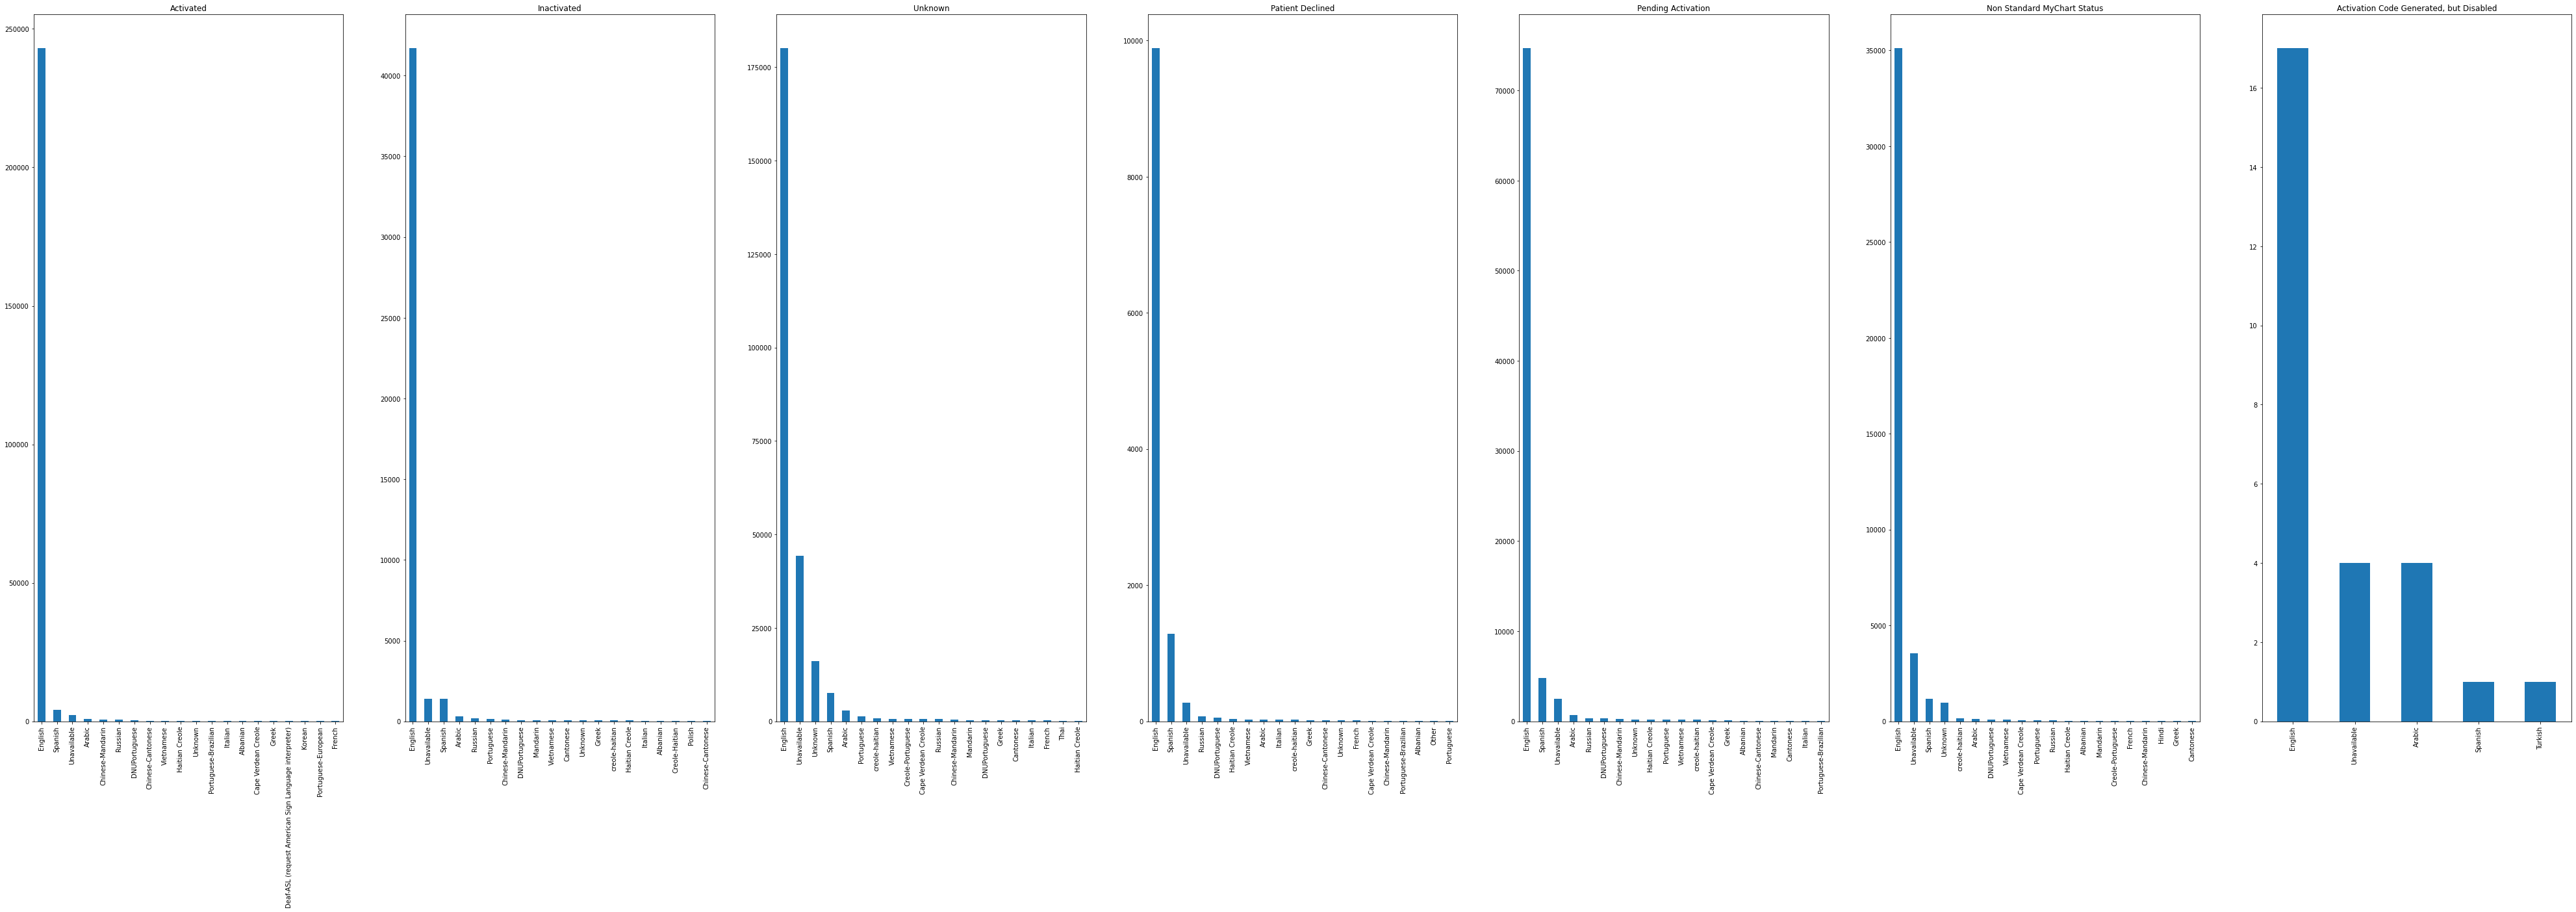

In [ ]:
#Top 20 primary languages
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status):
  status_1=data[data['MyChartStatusDSC']==s]
  plt.subplot(1,7,i+1)
  plt.title(s)


  status_1['PrimaryLanguageNM'].value_counts()[:20].plot(kind='bar')

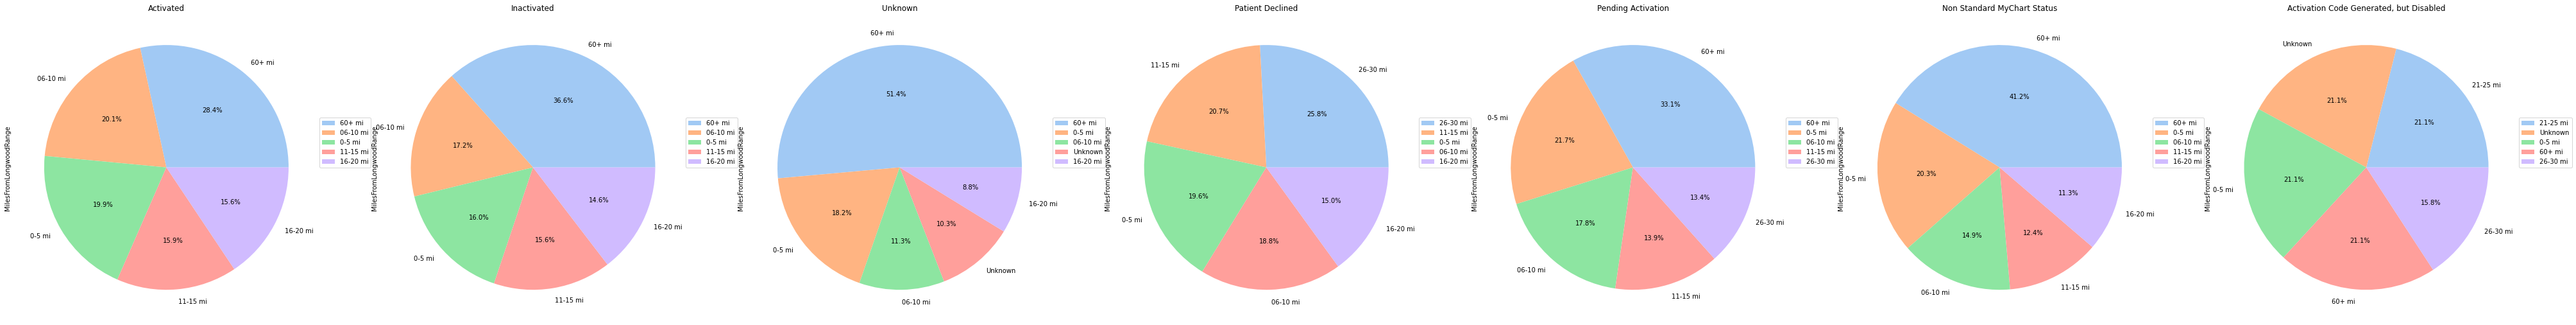

In [ ]:
#Top 5 MilesFromLongwoodRange
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status):

  status_1=data[data['MyChartStatusDSC']==s]
  data_mil1=status_1['MilesFromLongwoodRange'].value_counts()[:5].sort_values(ascending=False)
  labels = data_mil1.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_mil1.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)



In [ ]:
# create the plot
labels = data_ac_race.index
colors = sns.color_palette('pastel')[0:5]
data_ac_race.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
plt.legend(loc=(1.0,0.5))

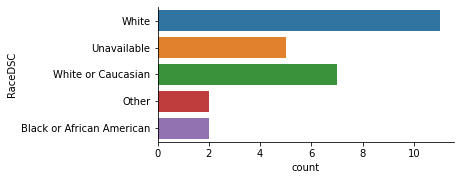

In [ ]:
ax = sns.catplot(y="RaceDSC", kind="count", data=data_activated, height=2.6, aspect=2.5)

# **Demographic Exploration: Q3**

Are the questionnaire responders different from non-responders? And in what way they are different? (We answer Question3 first because we think answering Q3 could help us understand Q2 better)

In [ ]:
questionnaire=pd.read_csv('/content/drive/Shareddrives/Capstone-B6/Dataset/Data Cleaned_Questionaire.csv')

In [ ]:
questionnaire.sample(5)

,Unnamed: 0,DFCIMRN,RootQuestionnaireID,RootQuestionnaireNM,RootAnswerID,FinalEncounterDTSRank,QuestionID,QuestionTXT,AnswerTXT,AnswerMethodDSC,RootQuestionnaireStatusDSC
385782,385782,0xBE0E9FB556696D5216019DF33852D793FF45BB1C843D...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x9936D922236DBE8EE6BEF7A53341EB8AED7704E7D0A6...,1,1.400002e+09,"In general, how would you rate your satisfacti...",Good,Welcome,Completed
49392,49392,0x183F2A9308230446415D6F6E92B77FC8EBCD044C1783...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x565B902DFA50411FA081860E72B4297B0EA969C7F779...,2,1.242560e+05,Did you complete this survey on your own?,Y,Welcome,Completed
187923,187923,0x5CCB5D788E8A9720B1C58D16C48DD96F50BB4C754FBF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x72746181255A9054E68E870BC930D33ACEDF76AD91F7...,3,1.400002e+09,PROMs PROMIS Global Health Short Form Score (P...,50.8,MyChart,Completed
220094,220094,0x6CDE0C600EBA958ED151627CB069AB4DA599C9DF78C2...,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,1,NaN,NaN,NaN,NaN,Assigned
439588,439588,0xD839A1519AE4B3C543C19E5E580E142830E03E557EC9...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x85813F308657596DFE1BCE8335159EB7F92CF0E0C07F...,1,1.242560e+05,Did you complete this survey on your own?,Y,Welcome,Completed


In [9]:
questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521180 entries, 0 to 521179
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  521180 non-null  int64  
 1   DFCIMRN                     521180 non-null  object 
 2   RootQuestionnaireID         521180 non-null  int64  
 3   RootQuestionnaireNM         521180 non-null  object 
 4   RootAnswerID                357405 non-null  object 
 5   FinalEncounterDTSRank       521180 non-null  int64  
 6   QuestionID                  356529 non-null  float64
 7   QuestionTXT                 356529 non-null  object 
 8   AnswerTXT                   351220 non-null  object 
 9   AnswerMethodDSC             356314 non-null  object 
 10  RootQuestionnaireStatusDSC  521180 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.7+ MB


In [10]:
questionnaire.drop_duplicates(subset=['DFCIMRN'],inplace=True) # we only keep unique patien ID for matching purpose

In [11]:
questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140596 entries, 0 to 521179
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  140596 non-null  int64  
 1   DFCIMRN                     140596 non-null  object 
 2   RootQuestionnaireID         140596 non-null  int64  
 3   RootQuestionnaireNM         140596 non-null  object 
 4   RootAnswerID                26072 non-null   object 
 5   FinalEncounterDTSRank       140596 non-null  int64  
 6   QuestionID                  25644 non-null   float64
 7   QuestionTXT                 25644 non-null   object 
 8   AnswerTXT                   25125 non-null   object 
 9   AnswerMethodDSC             25600 non-null   object 
 10  RootQuestionnaireStatusDSC  140596 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.9+ MB


In [12]:
df = pd.merge(data, questionnaire,on='DFCIMRN',how='left', indicator= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699432 entries, 0 to 699431
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Unnamed: 0_x                699432 non-null  int64   
 1   DFCIMRN                     699432 non-null  object  
 2   PatientBirthDTS             699432 non-null  int64   
 3   GenderDSC                   699432 non-null  object  
 4   InterpreterRequiredFLG      699432 non-null  object  
 5   PrimaryLanguageNM           699432 non-null  object  
 6   RaceDSC                     699432 non-null  object  
 7   EthnicityNM                 699432 non-null  object  
 8   MyChartStatusDSC            699432 non-null  object  
 9   MilesFromLongwoodRange      699432 non-null  object  
 10  Unnamed: 0_y                140019 non-null  float64 
 11  RootQuestionnaireID         140019 non-null  float64 
 12  RootQuestionnaireNM         140019 non-null  object  
 13 

In [26]:
responders = df[df['_merge'] == 'both']
nonresponders = df[df['_merge'] == 'left_only']

Patients composition

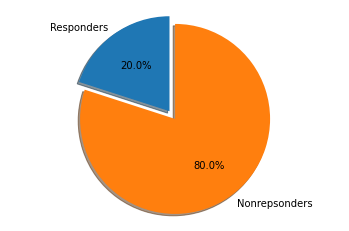

In [14]:
labels = 'Responders', 'Nonrepsonders'
sizes = [len(responders), len(nonresponders)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

birth year distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

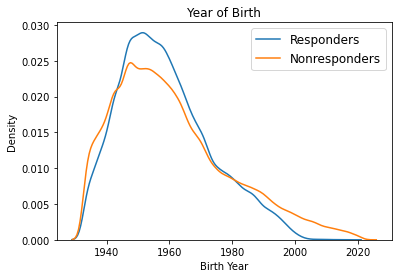

In [15]:
sns.distplot(responders['PatientBirthDTS'], hist = False, kde=True, label='Responders')

sns.distplot(nonresponders['PatientBirthDTS'], hist = False, kde=True,label='Nonresponders')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Year of Birth')
plt.xlabel('Birth Year')
plt.ylabel('Density')

Primary languages

In [17]:
languageR = responders['PrimaryLanguageNM'].value_counts()[:3].to_list()
languageN = nonresponders['PrimaryLanguageNM'].value_counts()[:3].to_list()#/len(nonresponders)

In [18]:
for idx,val in enumerate(languageR):
  languageR[idx] = val/len(responders)

In [19]:
for idx,val in enumerate(languageN):
  languageN[idx] = val/len(nonresponders)

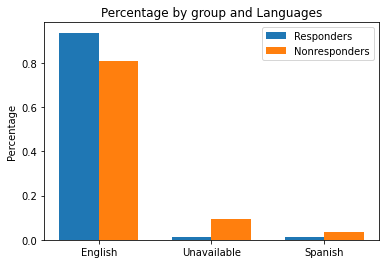

In [20]:
N = 3
languageR = tuple(languageR)
languageN = tuple(languageN)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, languageR, width, label='Responders')
plt.bar(ind + width, languageN, width,
    label='Nonresponders')

plt.ylabel('Percentage')
plt.title('Percentage by group and Languages')

plt.xticks(ind + width / 2, ("English", "Unavailable","Spanish"))
plt.legend(loc='best')
plt.show()

Race

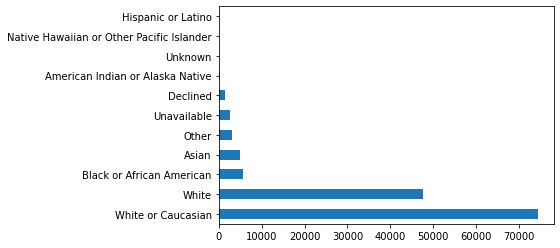

In [21]:
responders['RaceDSC'].value_counts().plot(kind='barh')

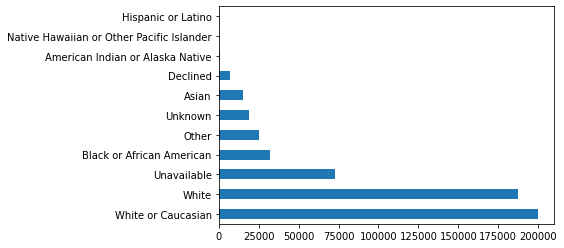

In [22]:
nonresponders['RaceDSC'].value_counts().plot(kind='barh')

We notice that there is a difference in Unavailable category between reponders and nonresponders, so we look into it

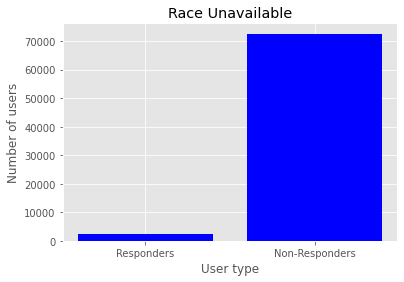

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Responders', 'Non-Responders']
energy = [len(responders[responders['RaceDSC'] == 'Unavailable']['_merge']),len(nonresponders[nonresponders['RaceDSC'] == 'Unavailable']['_merge'])]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='blue')
plt.xlabel("User type")
plt.ylabel("Number of users")
plt.title("Race Unavailable")

plt.xticks(x_pos, x)

plt.show()

MyChart Status

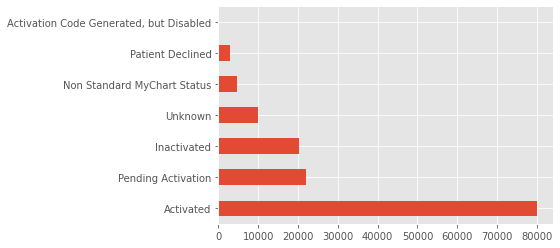

In [28]:
responders['MyChartStatusDSC'].value_counts().plot(kind='barh')

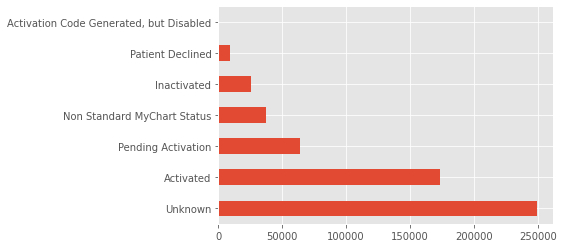

In [29]:
nonresponders['MyChartStatusDSC'].value_counts().plot(kind='barh')

We notice that there is noticable difference in Unknown statuss between responders and nonresponders, so we look into it. 

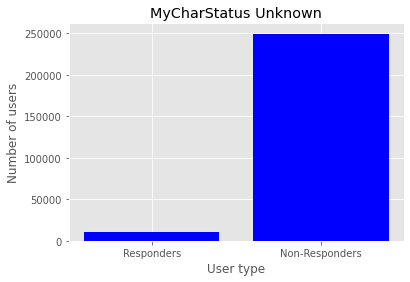

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Responders', 'Non-Responders']
energy = [len(responders[responders['MyChartStatusDSC'] == 'Unknown']['_merge']),len(nonresponders[nonresponders['MyChartStatusDSC'] == 'Unknown']['_merge'])]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='blue')
plt.xlabel("User type")
plt.ylabel("Number of users")
plt.title("MyCharStatus Unknown")

plt.xticks(x_pos, x)

plt.show()

Next, we combine both Race and MyChartStatus in one graph to provide more information 

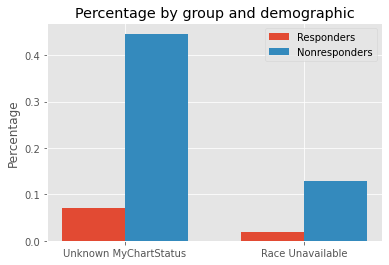

In [27]:
N = 2
Responders = (len(responders[responders['MyChartStatusDSC'] == 'Unknown'])/len(responders), len(responders[responders['RaceDSC'] == 'Unavailable'])/len(responders))
Nonresponders = (len(nonresponders[nonresponders['MyChartStatusDSC'] == 'Unknown'])/len(nonresponders), len(nonresponders[nonresponders['RaceDSC'] == 'Unavailable'])/len(nonresponders))

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, Responders, width, label='Responders')
plt.bar(ind + width, Nonresponders, width,
    label='Nonresponders')

plt.ylabel('Percentage')
plt.title('Percentage by group and demographic')

plt.xticks(ind + width / 2, ('Unknown MyChartStatus', 'Race Unavailable'))
plt.legend(loc='best')
plt.show()

Distance

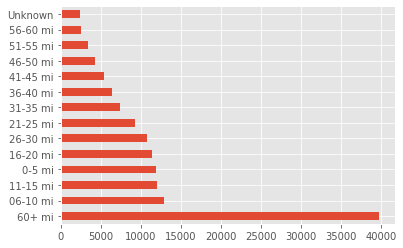

In [31]:
responders['MilesFromLongwoodRange'].value_counts()[:30].plot(kind='barh')

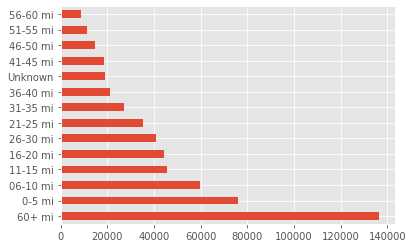

In [32]:
nonresponders['MilesFromLongwoodRange'].value_counts()[:30].plot(kind='barh')